In [119]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter

# one hot encoder
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')

from sklearn import preprocessing
labelencoder = preprocessing.LabelEncoder()

from pygam import LinearGAM, s, f, te

# ignore warning
import warnings
from pandas.core.common import SettingWithCopyWarning
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

# MD with the stock proce D-15 for regression

without groups

In [121]:
df_MD = pd.read_csv('./regression_df_input/MD_model_df.csv')
df_MD['date'] = df_MD['date'].astype(str)
# ------> multiple the probability with WA_sentiment
for i in range (1,23):
    df_MD['sentiment_'+'topic_'+str(i)] = df_MD['topic_'+str(i)]*df_MD['WA_sentiment']

sentiment_topic_columns = []
for i in range (1,23):
    sentiment_topic_columns.append('sentiment_'+'topic_'+str(i))
df_MD_standard = df_MD[sentiment_topic_columns]

# ------> Standardize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df_MD_standard)
df_MD_scale = scaler.transform(df_MD_standard)
# append the scaled data to the original dataframe
df_MD_scale = pd.DataFrame(df_MD_scale, columns=sentiment_topic_columns)
df_MD_scale.index = df_MD_standard.index
# other columns
other_columns = ['company_name','Group','ticker','file_name','date','WA_sentiment', 'D-30']
df_MD = pd.concat([df_MD_scale, df_MD[other_columns]], axis=1)
df_MD.head()

def same_direction(df_MD, day_type):
    df_MD_same = df_MD[((df_MD['WA_sentiment']<0) & (df_MD[day_type]<0)) | ((df_MD['WA_sentiment']>0) & (df_MD[day_type]>0))]
    return df_MD_same

df_MD_same = same_direction(df_MD, 'D-30')
# df_MD_same['group'] = labelencoder.fit_transform(df_MD_same['Group'])

X = df_MD_same.iloc[:,0:22]
Y = df_MD_same['D-30']

gam = LinearGAM(s(0)+s(1)+s(2)+s(3)+s(4)+s(5)+s(6)+s(7)+s(8)+s(9)+s(10)+
s(11)+s(12)+s(13)+s(14)+s(15)+s(16)+s(17)+s(18)+s(19)+s(20)+s(21)).fit(X, Y)
gam.summary()

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                    135.4222
Link Function:                     IdentityLink Log Likelihood:                               -118552.8575
Number of Samples:                         1101 AIC:                                           237378.5595
                                                AICc:                                          237417.4717
                                                GCV:                                                 0.005
                                                Scale:                                              0.0039
                                                Pseudo R-Squared:                                   0.3115
Feature Function                  Lam

In [122]:
df_MD = pd.read_csv('./regression_df_input/MD_model_df.csv')
df_MD['date'] = df_MD['date'].astype(str)
# ------> multiple the probability with WA_sentiment
for i in range (1,23):
    df_MD['sentiment_'+'topic_'+str(i)] = df_MD['topic_'+str(i)]*df_MD['WA_sentiment']

sentiment_topic_columns = []
for i in range (1,23):
    sentiment_topic_columns.append('sentiment_'+'topic_'+str(i))
df_MD_standard = df_MD[sentiment_topic_columns]

# ------> Standardize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df_MD_standard)
df_MD_scale = scaler.transform(df_MD_standard)
# append the scaled data to the original dataframe
df_MD_scale = pd.DataFrame(df_MD_scale, columns=sentiment_topic_columns)
df_MD_scale.index = df_MD_standard.index
# other columns
other_columns = ['company_name','Group','ticker','file_name','date','WA_sentiment', 'D-20']
df_MD = pd.concat([df_MD_scale, df_MD[other_columns]], axis=1)
df_MD.head()

def same_direction(df_MD, day_type):
    df_MD_same = df_MD[((df_MD['WA_sentiment']<0) & (df_MD[day_type]<0)) | ((df_MD['WA_sentiment']>0) & (df_MD[day_type]>0))]
    return df_MD_same

df_MD_same = same_direction(df_MD, 'D-20')
# df_MD_same['group'] = labelencoder.fit_transform(df_MD_same['Group'])

X = df_MD_same.iloc[:,0:22]
Y = df_MD_same['D-20']

gam = LinearGAM(s(0)+s(1)+s(2)+s(3)+s(4)+s(5)+s(6)+s(7)+s(8)+s(9)+s(10)+
s(11)+s(12)+s(13)+s(14)+s(15)+s(16)+s(17)+s(18)+s(19)+s(20)+s(21)).fit(X, Y)
gam.summary()

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                    132.6145
Link Function:                     IdentityLink Log Likelihood:                               -184502.4949
Number of Samples:                         1083 AIC:                                           369272.2187
                                                AICc:                                          369310.1493
                                                GCV:                                                0.0032
                                                Scale:                                              0.0025
                                                Pseudo R-Squared:                                   0.3646
Feature Function                  Lam

In [99]:
df_MD = pd.read_csv('./regression_df_input/MD_model_df.csv')
df_MD['date'] = df_MD['date'].astype(str)
# ------> multiple the probability with WA_sentiment
for i in range (1,23):
    df_MD['sentiment_'+'topic_'+str(i)] = df_MD['topic_'+str(i)]*df_MD['WA_sentiment']

sentiment_topic_columns = []
for i in range (1,23):
    sentiment_topic_columns.append('sentiment_'+'topic_'+str(i))
df_MD_standard = df_MD[sentiment_topic_columns]

# ------> Standardize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df_MD_standard)
df_MD_scale = scaler.transform(df_MD_standard)
# append the scaled data to the original dataframe
df_MD_scale = pd.DataFrame(df_MD_scale, columns=sentiment_topic_columns)
df_MD_scale.index = df_MD_standard.index
# other columns
other_columns = ['company_name','Group','ticker','file_name','date','WA_sentiment', 'D-15']
df_MD = pd.concat([df_MD_scale, df_MD[other_columns]], axis=1)
df_MD.head()

def same_direction(df_MD, day_type):
    df_MD_same = df_MD[((df_MD['WA_sentiment']<0) & (df_MD[day_type]<0)) | ((df_MD['WA_sentiment']>0) & (df_MD[day_type]>0))]
    return df_MD_same

df_MD_same = same_direction(df_MD, 'D-15')
# df_MD_same['group'] = labelencoder.fit_transform(df_MD_same['Group'])

X = df_MD_same.iloc[:,0:22]
Y = df_MD_same['D-15']

gam = LinearGAM(s(0)+s(1)+s(2)+s(3)+s(4)+s(5)+s(6)+s(7)+s(8)+s(9)+s(10)+
s(11)+s(12)+s(13)+s(14)+s(15)+s(16)+s(17)+s(18)+s(19)+s(20)+s(21)).fit(X, Y)
gam.summary()

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                    132.6208
Link Function:                     IdentityLink Log Likelihood:                               -223036.3142
Number of Samples:                         1036 AIC:                                           446339.8701
                                                AICc:                                          446379.7826
                                                GCV:                                                0.0026
                                                Scale:                                               0.002
                                                Pseudo R-Squared:                                   0.3361
Feature Function                  Lam

In [112]:
df_MD = pd.read_csv('./regression_df_input/MD_model_df.csv')
df_MD['date'] = df_MD['date'].astype(str)
# ------> multiple the probability with WA_sentiment
for i in range (1,23):
    df_MD['sentiment_'+'topic_'+str(i)] = df_MD['topic_'+str(i)]*df_MD['WA_sentiment']

sentiment_topic_columns = []
for i in range (1,23):
    sentiment_topic_columns.append('sentiment_'+'topic_'+str(i))
df_MD_standard = df_MD[sentiment_topic_columns]

# ------> Standardize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df_MD_standard)
df_MD_scale = scaler.transform(df_MD_standard)
# append the scaled data to the original dataframe
df_MD_scale = pd.DataFrame(df_MD_scale, columns=sentiment_topic_columns)
df_MD_scale.index = df_MD_standard.index
# other columns
other_columns = ['company_name','Group','ticker','file_name','date','WA_sentiment', 'D-1']
df_MD = pd.concat([df_MD_scale, df_MD[other_columns]], axis=1)

def same_direction(df_MD, day_type):
    df_MD_same = df_MD[((df_MD['WA_sentiment']<0) & (df_MD[day_type]<0)) | ((df_MD['WA_sentiment']>0) & (df_MD[day_type]>0))]
    return df_MD_same

df_MD_same = same_direction(df_MD, 'D-1')
# df_MD_same['group'] = labelencoder.fit_transform(df_MD_same['Group'])

X = df_MD_same.iloc[:,0:22]
Y = df_MD_same['D-1']

gam = LinearGAM(s(0)+s(1)+s(2)+s(3)+s(4)+s(5)+s(6)+s(7)+s(8)+s(9)+s(10)+
s(11)+s(12)+s(13)+s(14)+s(15)+s(16)+s(17)+s(18)+s(19)+s(20)+s(21)).fit(X, Y)
gam.summary()


LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                    131.8255
Link Function:                     IdentityLink Log Likelihood:                               -658134.4832
Number of Samples:                          966 AIC:                                          1316534.6173
                                                AICc:                                         1316577.3378
                                                GCV:                                                0.0008
                                                Scale:                                              0.0006
                                                Pseudo R-Squared:                                   0.2206
Feature Function                  Lam

In [114]:
df_MD = pd.read_csv('./regression_df_input/MD_model_df.csv')
df_MD['date'] = df_MD['date'].astype(str)
# ------> multiple the probability with WA_sentiment
for i in range (1,23):
    df_MD['sentiment_'+'topic_'+str(i)] = df_MD['topic_'+str(i)]*df_MD['WA_sentiment']

sentiment_topic_columns = []
for i in range (1,23):
    sentiment_topic_columns.append('sentiment_'+'topic_'+str(i))
df_MD_standard = df_MD[sentiment_topic_columns]

# ------> Standardize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df_MD_standard)
df_MD_scale = scaler.transform(df_MD_standard)
# append the scaled data to the original dataframe
df_MD_scale = pd.DataFrame(df_MD_scale, columns=sentiment_topic_columns)
df_MD_scale.index = df_MD_standard.index
# other columns
other_columns = ['company_name','Group','ticker','file_name','date','WA_sentiment', 'D-2']
df_MD = pd.concat([df_MD_scale, df_MD[other_columns]], axis=1)

def same_direction(df_MD, day_type):
    df_MD_same = df_MD[((df_MD['WA_sentiment']<0) & (df_MD[day_type]<0)) | ((df_MD['WA_sentiment']>0) & (df_MD[day_type]>0))]
    return df_MD_same

df_MD_same = same_direction(df_MD, 'D-2')
# df_MD_same['group'] = labelencoder.fit_transform(df_MD_same['Group'])

X = df_MD_same.iloc[:,0:22]
Y = df_MD_same['D-2']

gam = LinearGAM(s(0)+s(1)+s(2)+s(3)+s(4)+s(5)+s(6)+s(7)+s(8)+s(9)+s(10)+
s(11)+s(12)+s(13)+s(14)+s(15)+s(16)+s(17)+s(18)+s(19)+s(20)+s(21)).fit(X, Y)
gam.summary()

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                    126.8355
Link Function:                     IdentityLink Log Likelihood:                               -558867.2777
Number of Samples:                          967 AIC:                                          1117990.2264
                                                AICc:                                          1118029.526
                                                GCV:                                                 0.001
                                                Scale:                                              0.0007
                                                Pseudo R-Squared:                                    0.248
Feature Function                  Lam

In [115]:
df_MD = pd.read_csv('./regression_df_input/MD_model_df.csv')
df_MD['date'] = df_MD['date'].astype(str)
# ------> multiple the probability with WA_sentiment
for i in range (1,23):
    df_MD['sentiment_'+'topic_'+str(i)] = df_MD['topic_'+str(i)]*df_MD['WA_sentiment']

sentiment_topic_columns = []
for i in range (1,23):
    sentiment_topic_columns.append('sentiment_'+'topic_'+str(i))
df_MD_standard = df_MD[sentiment_topic_columns]

# ------> Standardize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df_MD_standard)
df_MD_scale = scaler.transform(df_MD_standard)
# append the scaled data to the original dataframe
df_MD_scale = pd.DataFrame(df_MD_scale, columns=sentiment_topic_columns)
df_MD_scale.index = df_MD_standard.index
# other columns
other_columns = ['company_name','Group','ticker','file_name','date','WA_sentiment', 'D-3']
df_MD = pd.concat([df_MD_scale, df_MD[other_columns]], axis=1)

def same_direction(df_MD, day_type):
    df_MD_same = df_MD[((df_MD['WA_sentiment']<0) & (df_MD[day_type]<0)) | ((df_MD['WA_sentiment']>0) & (df_MD[day_type]>0))]
    return df_MD_same

df_MD_same = same_direction(df_MD, 'D-3')
# df_MD_same['group'] = labelencoder.fit_transform(df_MD_same['Group'])

X = df_MD_same.iloc[:,0:22]
Y = df_MD_same['D-3']

gam = LinearGAM(s(0)+s(1)+s(2)+s(3)+s(4)+s(5)+s(6)+s(7)+s(8)+s(9)+s(10)+
s(11)+s(12)+s(13)+s(14)+s(15)+s(16)+s(17)+s(18)+s(19)+s(20)+s(21)).fit(X, Y)
gam.summary()

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                    128.1442
Link Function:                     IdentityLink Log Likelihood:                               -499830.4145
Number of Samples:                          970 AIC:                                           999919.1173
                                                AICc:                                          999959.1417
                                                GCV:                                                0.0011
                                                Scale:                                              0.0008
                                                Pseudo R-Squared:                                   0.2428
Feature Function                  Lam

With Groups

In [100]:
def same_direction(df_MD, day_type):
    df_MD_same = df_MD[((df_MD['WA_sentiment']<0) & (df_MD[day_type]<0)) | ((df_MD['WA_sentiment']>0) & (df_MD[day_type]>0))]
    return df_MD_same

df_MD_same = same_direction(df_MD, 'D-15')
df_MD_same['Group'] = labelencoder.fit_transform(df_MD_same['Group'])
df_MD_same = df_MD_same.drop(['company_name'], axis=1)

X = df_MD_same.iloc[:,0:23].values.tolist()
Y = df_MD_same['D-15']

gam = LinearGAM(s(0)+s(1)+s(2)+s(3)+s(4)+s(5)+s(6)+s(7)+s(8)+s(9)+s(10)+
s(11)+s(12)+s(13)+s(14)+s(15)+s(16)+s(17)+s(18)+s(19)+s(20)+s(21)+f(22)).fit(X, Y)
gam.summary()

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                    140.9138
Link Function:                     IdentityLink Log Likelihood:                                -221879.554
Number of Samples:                         1036 AIC:                                           444042.9357
                                                AICc:                                          444088.3545
                                                GCV:                                                0.0026
                                                Scale:                                               0.002
                                                Pseudo R-Squared:                                   0.3449
Feature Function                  Lam

<Figure size 432x288 with 0 Axes>

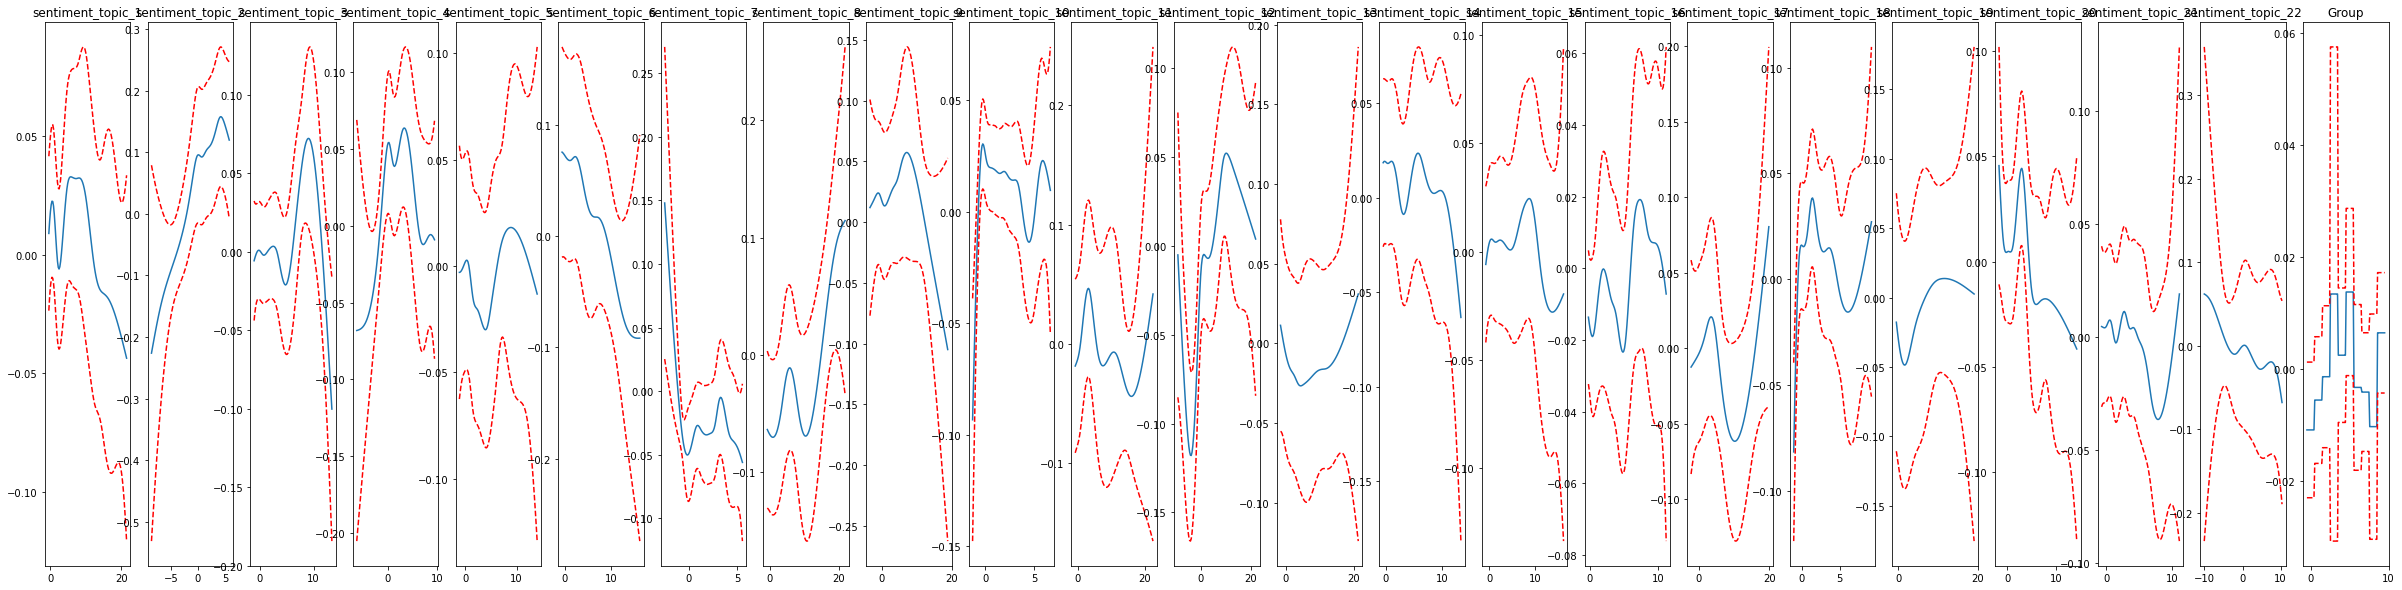

In [103]:
## plotting
plt.figure()
fig, axs = plt.subplots(1,23, figsize=(42,10))

titles = df_MD_same.iloc[:,0:23].columns.to_list()

for i, ax in enumerate(axs):
    XX = gam.generate_X_grid(term=i)
    ax.plot(XX[:, i], gam.partial_dependence(term=i, X=XX))
    ax.plot(XX[:, i], gam.partial_dependence(term=i, X=XX, width=.95)[1], c='r', ls='--')
    ax.set_title(titles[i])

In [88]:
df_MD_interp = pd.read_csv('./regression_df_input/MD_model_df.csv')
def same_direction(df_MD, day_type):
    df_MD_same = df_MD[((df_MD['WA_sentiment']<0) & (df_MD[day_type]<0)) | ((df_MD['WA_sentiment']>0) & (df_MD[day_type]>0))]
    return df_MD_same

# apply the same_direction function to the dataframe
df_MD_interp_same = same_direction(df_MD, 'D-15')
# sort the value by df_MD_interp_same["sentiment_topic_2"]
df_MD_interp_same_tp4 = df_MD_interp_same.sort_values(by=['sentiment_topic_4'], ascending=False)
df_MD_interp_same_tp4.head(10)

,sentiment_topic_1,sentiment_topic_2,sentiment_topic_3,sentiment_topic_4,sentiment_topic_5,sentiment_topic_6,sentiment_topic_7,sentiment_topic_8,sentiment_topic_9,sentiment_topic_10,sentiment_topic_11,sentiment_topic_12,sentiment_topic_13,sentiment_topic_14,sentiment_topic_15,sentiment_topic_16,sentiment_topic_17,sentiment_topic_18,sentiment_topic_19,sentiment_topic_20,sentiment_topic_21,sentiment_topic_22,company_name,Group,ticker,file_name,date,WA_sentiment,D-15
1632,-0.177688,3.718857,0.026707,9.469947,-0.232889,0.218707,-0.137560,-0.098548,-0.093653,-0.368421,-0.069450,0.386176,-0.325838,0.327610,0.666763,-0.156638,-0.137061,-0.032092,0.446615,4.261021,3.752003,-0.066398,Baloise Holding,Other insurers,BALN.SW,20200827_Baloise_Holding_AG-_Earnings_Call_202...,2020-08-27,0.028498,0.033476
1634,-0.173264,5.154211,0.883068,9.298130,0.850765,1.998856,-0.132149,-0.091405,3.297273,1.290888,0.696683,-0.090158,-0.319230,-0.022983,0.010091,-0.154383,-0.129020,-0.252512,0.405506,7.226384,-0.333045,-0.062130,Baloise Holding,Other insurers,BALN.SW,20210826_Baloise_Holding_AG-_Earnings_Call_202...,2021-08-26,0.035101,0.028866
283,-0.160147,-0.113148,8.183813,8.305107,0.369111,1.617095,-0.116105,1.040386,-0.042692,1.308445,-0.032835,-0.072820,-0.299638,1.708461,0.874037,1.451279,-0.105182,0.276707,0.975694,-0.204121,-0.004656,0.334719,GENERALI ASSIC-,Global Commercial,G.MI,20160318_GENERALI_ASSIC-_Earnings_Call_2016-3-...,2016-03-18,0.039625,0.068911
1769,0.051155,-0.123411,1.880202,6.903965,-0.271199,0.005073,0.690662,-0.133102,1.334927,-0.418422,0.525894,0.750617,-0.127323,-0.234677,-0.119559,-0.141481,1.871189,-0.045541,-0.018105,-0.003422,-0.314079,-0.086557,Helvetia Holding,Other insurers,HELN.SW,20210622_Helvetia_Holding_AG-_Shareholder_Mtg_...,2021-06-22,0.017093,0.010880
1640,0.713646,-0.207810,-0.227503,4.562819,4.636502,-0.045216,0.611733,-0.148372,2.781691,-0.400498,0.206574,-0.136795,-0.349521,-0.224552,-0.246456,-0.172369,-0.193142,5.585374,0.763668,-0.217364,-0.337852,-0.096167,Sampo Oyj-,Other insurers,SAMPO.HE,20120508_Sampo_Oyj-_Earnings_Call_2012-5-8_SD0...,2012-05-08,0.024027,0.034465
1633,-0.249243,-0.287406,0.254454,4.097453,0.436029,-0.213623,-0.225084,-0.214080,-0.301538,-0.342722,-0.218815,-0.190588,-0.432719,1.709807,-0.304048,-0.164597,-0.267103,-0.074398,-0.112710,-0.065748,-0.347603,-0.073759,Baloise Holding,Other insurers,BALN.SW,20210309_Baloise_Holding_AG-_Earnings_Call_202...,2021-03-09,0.009623,0.035874
1436,0.244637,-0.202681,-0.120337,3.256794,-0.256828,-0.145054,-0.172097,-0.144137,-0.052214,-0.397772,-0.128390,-0.133328,-0.273942,0.172720,13.311416,-0.171032,1.690188,-0.142958,0.970731,-0.252992,-0.371348,4.865110,Sanlam Ltd-,Life Groups & Retail Life,SLM.JO,20201218_Sanlam_Ltd-_M-A_Call_2020-12-18_RT000...,2020-12-18,0.033458,0.016479
261,-0.236340,-0.262171,0.837670,3.256782,1.778282,0.130655,-0.209302,-0.193248,0.031568,-0.098869,-0.191883,-0.173534,1.245968,2.035442,-0.285789,0.586930,-0.243655,0.712824,0.220051,-0.285464,-0.293461,-0.037654,ZURICH INSURANCE-,Global Commercial,ZURN.SW,20190207_ZURICH_INSURANCE-_Earnings_Call_2019-...,2019-02-07,0.017773,0.028581
923,-0.101735,1.327805,-0.238255,3.126936,0.287061,1.178578,-0.044657,0.024085,0.127009,-0.289470,0.089095,0.004390,10.543868,2.672645,0.625482,-0.117920,6.604285,0.310859,2.520459,-0.141762,4.199914,0.917031,Swiss Re,European (Re)Insurers,SREN.SW,20180803_Swiss_Re_AG-_Earnings_Call_2018-8-3_F...,2018-08-03,0.048666,0.007713
315,0.118262,0.431382,0.103807,3.065398,0.018025,16.100254,0.224437,7.227865,0.766161,-0.060785,22.415092,0.295187,0.116222,0.342212,0.216026,-0.005772,0.400793,0.479242,9.330304,0.093104,1.936265,0.219104,GENERALI ASSIC-,Global Commercial,G.MI,20210518_GENERALI_ASSIC-_Earnings_Call_2021-5-...,2021-05-18,0.083340,0.050817


In [87]:
df_MD_interp_same_tp4.tail(10)

,sentiment_topic_1,sentiment_topic_2,sentiment_topic_3,sentiment_topic_4,sentiment_topic_5,sentiment_topic_6,sentiment_topic_7,sentiment_topic_8,sentiment_topic_9,sentiment_topic_10,sentiment_topic_11,sentiment_topic_12,sentiment_topic_13,sentiment_topic_14,sentiment_topic_15,sentiment_topic_16,sentiment_topic_17,sentiment_topic_18,sentiment_topic_19,sentiment_topic_20,sentiment_topic_21,sentiment_topic_22,company_name,Group,ticker,file_name,date,WA_sentiment,D-15
1054,-0.259156,-0.312595,-0.498924,-0.323126,-0.301960,-0.249839,-0.237209,-0.230086,-0.330568,-0.453106,-0.239508,-1.453504,-0.450418,-0.312619,-0.319459,-0.198168,-0.285119,-0.504653,-0.165556,-0.309821,-0.455936,-0.144990,Sompo Holdings,Japanese & Pacific,8630.T,20190520_Sompo_Holdings_Inc-_Earnings_Call_201...,2019-05-20,-0.000955,-0.029911
372,-0.261903,-0.459101,-0.633675,-0.331508,-0.313411,-0.311582,-0.250490,-0.234522,-0.409198,-0.902936,-0.245243,-0.207323,-1.481903,-0.468880,-0.337310,-0.199568,-0.290112,-0.657819,-0.177218,-0.312754,-0.743986,-0.156843,LANCASHIRE HOLDI-,London Market,LRE.L,20170727_LANCASHIRE_HOLDI-_Earnings_Call_2017-...,2017-07-27,-0.003412,-0.002710
429,-0.287284,-8.024151,-0.547285,-0.334239,-0.360439,-0.427206,-0.417529,-0.588255,-1.117508,-0.667140,-0.658129,-0.305129,-0.527477,-0.440022,-0.372834,-0.212507,-0.629719,-0.563986,-0.192921,-0.339851,-0.482438,-10.009939,AMERICAN INTERNA-,US - Specialty/P&C/Reinsurance,AIG,20200401_AMERICAN_INTERNA-_Conf-Presentation_C...,2020-04-01,-0.019054,-0.333642
1580,-0.258993,-0.306477,-0.493408,-0.346851,-0.301822,-0.242937,-0.246670,-0.229823,-0.329866,-0.530542,-0.239168,-0.203477,-0.447284,-0.312038,-0.338988,-0.198085,-0.284823,-0.467699,-0.165442,-0.309648,-0.433585,-0.147975,NN Group,Other insurers,NN.AS,20190815_NN_Group_NV-_Earnings_Call_2019-8-15_...,2019-08-15,-0.000189,-0.126571
546,-0.335638,-8.463519,-0.537684,-0.378175,-0.325808,-0.458820,-0.532881,-0.525455,-0.941890,-0.482345,-0.739585,-0.240872,-0.642545,-0.371607,-0.415415,-0.212507,-0.494267,-0.563986,-0.204059,-0.426738,-0.466763,-9.701107,TRAVELERS COS,US - Specialty/P&C/Reinsurance,TRV,20200401_TRAVELERS_COS_IN-_Conf-Presentation_C...,2020-04-01,-0.019054,-0.154529
589,-0.260337,-0.576720,-0.542709,-0.383862,-0.302406,-0.283168,-0.242337,-0.316640,-0.336525,-1.091517,-0.240605,-0.208744,-0.644897,-0.378321,-0.318820,-0.198436,-0.286074,-0.725426,-0.168049,-0.310382,-0.434877,-0.285203,ARCH CAPITAL,US - Specialty/P&C/Reinsurance,ACGL,20200505_ARCH_CAPITAL_GRP-_Earnings_Call_2020-...,2020-05-05,-0.001880,-0.188376
824,-0.287284,-7.870571,-0.541376,-0.385058,-0.339821,-0.451389,-0.533846,-0.525455,-0.949716,-0.482345,-0.658261,-0.302967,-0.633658,-0.361102,-0.412882,-0.212507,-0.723166,-0.580850,-0.204059,-0.339851,-0.499747,-10.060419,BERKSHIRE HATH-A,US - Specialty/P&C/Reinsurance,BRK-B,20200401_BERKSHIRE_HATH-A_Conf-Presentation_Ca...,2020-04-01,-0.019054,-0.096023
645,-0.277621,-0.828450,-0.652386,-0.386390,-0.329141,-0.323807,-0.242269,-0.269635,-0.871768,-0.518288,-0.275308,-0.209160,-0.667468,-0.400999,-0.435794,-0.200277,-0.852013,-0.616597,-0.185146,-0.336002,-0.443693,-0.328893,RENAISSANCERE- Conf-Presentation,US - Specialty/P&C/Reinsurance,RNR,20150910_RENAISSANCERE-_Conf-Presentation_Call...,2015-09-10,-0.002655,-0.030312
764,-0.296729,-8.567705,-0.537684,-0.394824,-0.325808,-0.468540,-0.491192,-0.587943,-0.811915,-0.482345,-0.522601,-0.285187,-0.587046,-0.361102,-0.373045,-0.212507,-0.696944,-0.587635,-0.205933,-0.339851,-0.499609,-9.819828,HARTFORD FINL,US - Specialty/P&C/Reinsurance,HIG,20200401_HARTFORD_FINL_SV-_Conf-Presentation_C...,2020-04-01,-0.019054,-0.258586
446,-0.339358,-2.391118,-0.706702,-6.215192,-0.372238,-0.404433,-2.453820,-0.286447,-3.315000,-1.096701,-0.312374,-0.373461,-0.998672,-0.372858,-0.367475,-0.215962,-2.134902,-0.555728,-0.439225,-0.535978,-0.474713,-0.844282,AMERICAN INTERNA-,US - Specialty/P&C/Reinsurance,AIG,20210630_AMERICAN_INTERNA-_Conf-Presentation_C...,2021-06-30,-0.015674,-0.

In [118]:
# read the csv
topic_modelling_df_MD22 = pd.read_csv('./main_df_output/topic_modelling_df_MD22.csv')
# topic_modelling_df_MD22 sort by 'topic_2'
topic_modelling_df_MD22_tp2 = topic_modelling_df_MD22.sort_values(by=['topic_2'], ascending=False)
# topic_modelling_df_MD22_tp2 save to csv
topic_modelling_df_MD22_tp2.to_csv('topic_modelling_df_MD22_tp2.csv', index=False)


# QA with the stock proce D-1 for regression

In [104]:
df_QA = pd.read_csv('./regression_df_input/QA_model_df.csv')
df_QA['date'] = df_QA['date'].astype(str)
# ------> multiple the probability with WA_sentiment
for i in range (1,9):
    df_QA['sentiment_'+'topic_'+str(i)] = df_QA['topic_'+str(i)]*df_QA['WA_sentiment']

sentiment_topic_columns = []
for i in range (1,9):
    sentiment_topic_columns.append('sentiment_'+'topic_'+str(i))
df_QA_standard = df_QA[sentiment_topic_columns]

# ------> Standardize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df_QA_standard)
df_QA_scale = scaler.transform(df_QA_standard)
# append the scaled data to the original dataframe
df_QA_scale = pd.DataFrame(df_QA_scale, columns=sentiment_topic_columns)
df_QA_scale.index = df_QA_standard.index
# other columns
other_columns = ['company_name','Group','ticker','file_name','date','WA_sentiment', 'D-1']
df_QA = pd.concat([df_QA_scale, df_QA[other_columns]], axis=1)
df_QA.head()

,sentiment_topic_1,sentiment_topic_2,sentiment_topic_3,sentiment_topic_4,sentiment_topic_5,sentiment_topic_6,sentiment_topic_7,sentiment_topic_8,company_name,Group,ticker,file_name,date,WA_sentiment,D-1
0,-0.574383,0.659008,-0.489167,0.609011,0.425316,-0.289616,-0.342206,-0.521563,Admiral Group,Motor/Personal,ADM.L,20110302_Admiral_Group_PLC-_Earnings_Call_2011...,2011-03-02,0.014586,-0.031030
1,-0.188552,0.505780,-0.306110,0.255963,2.523274,-0.379394,-0.017298,-0.346897,Admiral Group,Motor/Personal,ADM.L,20110824_Admiral_Group_PLC-_Earnings_Call_2011...,2011-08-24,0.021825,-0.118567
2,-0.651105,1.019315,-0.511619,-0.171260,-0.457107,-0.115128,-0.355264,-0.284981,Admiral Group,Motor/Personal,ADM.L,20111109_Admiral_Group_PLC-_Guidance_Call_2011...,2011-11-09,0.013218,-0.256077
3,-0.437155,1.488000,-0.258071,0.314521,1.454236,-0.053432,-0.251434,0.483739,Admiral Group,Motor/Personal,ADM.L,20111109_Admiral_Group_PLC-_Guidance_Call_2011...,2011-11-09,0.025269,-0.256077
4,-0.389075,3.696063,-0.060091,2.101670,0.284701,-0.025923,0.652275,0.173974,Admiral Group,Motor/Personal,ADM.L,20120307_Admiral_Group_PLC-_Earnings_Call_2012...,2012-03-07,0.037031,0.100000


without groups

In [105]:
df_QA_same = same_direction(df_QA, 'D-1')
# df_MD_same['group'] = labelencoder.fit_transform(df_MD_same['Group'])

X = df_QA_same.iloc[:,0:8]
Y = df_QA_same['D-1']

gam = LinearGAM(s(0)+s(1)+s(2)+s(3)+s(4)+s(5)+s(6)+s(7)).fit(X, Y)
gam.summary()

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     59.0686
Link Function:                     IdentityLink Log Likelihood:                               -839964.1351
Number of Samples:                          975 AIC:                                          1680048.4074
                                                AICc:                                         1680056.4349
                                                GCV:                                                0.0006
                                                Scale:                                              0.0005
                                                Pseudo R-Squared:                                   0.2178
Feature Function                  Lam

with groups

In [106]:
df_QA_same = same_direction(df_QA, 'D-1')
df_QA_same['Group'] = labelencoder.fit_transform(df_QA_same['Group'])
df_QA_same = df_QA_same.drop(['company_name'], axis=1)

X = df_QA_same.iloc[:,0:9]
Y = df_QA_same['D-1']

gam = LinearGAM(s(0)+s(1)+s(2)+s(3)+s(4)+s(5)+s(6)+s(7)+f(8)).fit(X, Y)
gam.summary()

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     67.7337
Link Function:                     IdentityLink Log Likelihood:                                -876950.843
Number of Samples:                          975 AIC:                                          1754039.1534
                                                AICc:                                         1754049.7427
                                                GCV:                                                0.0006
                                                Scale:                                              0.0005
                                                Pseudo R-Squared:                                   0.2647
Feature Function                  Lam

<Figure size 432x288 with 0 Axes>

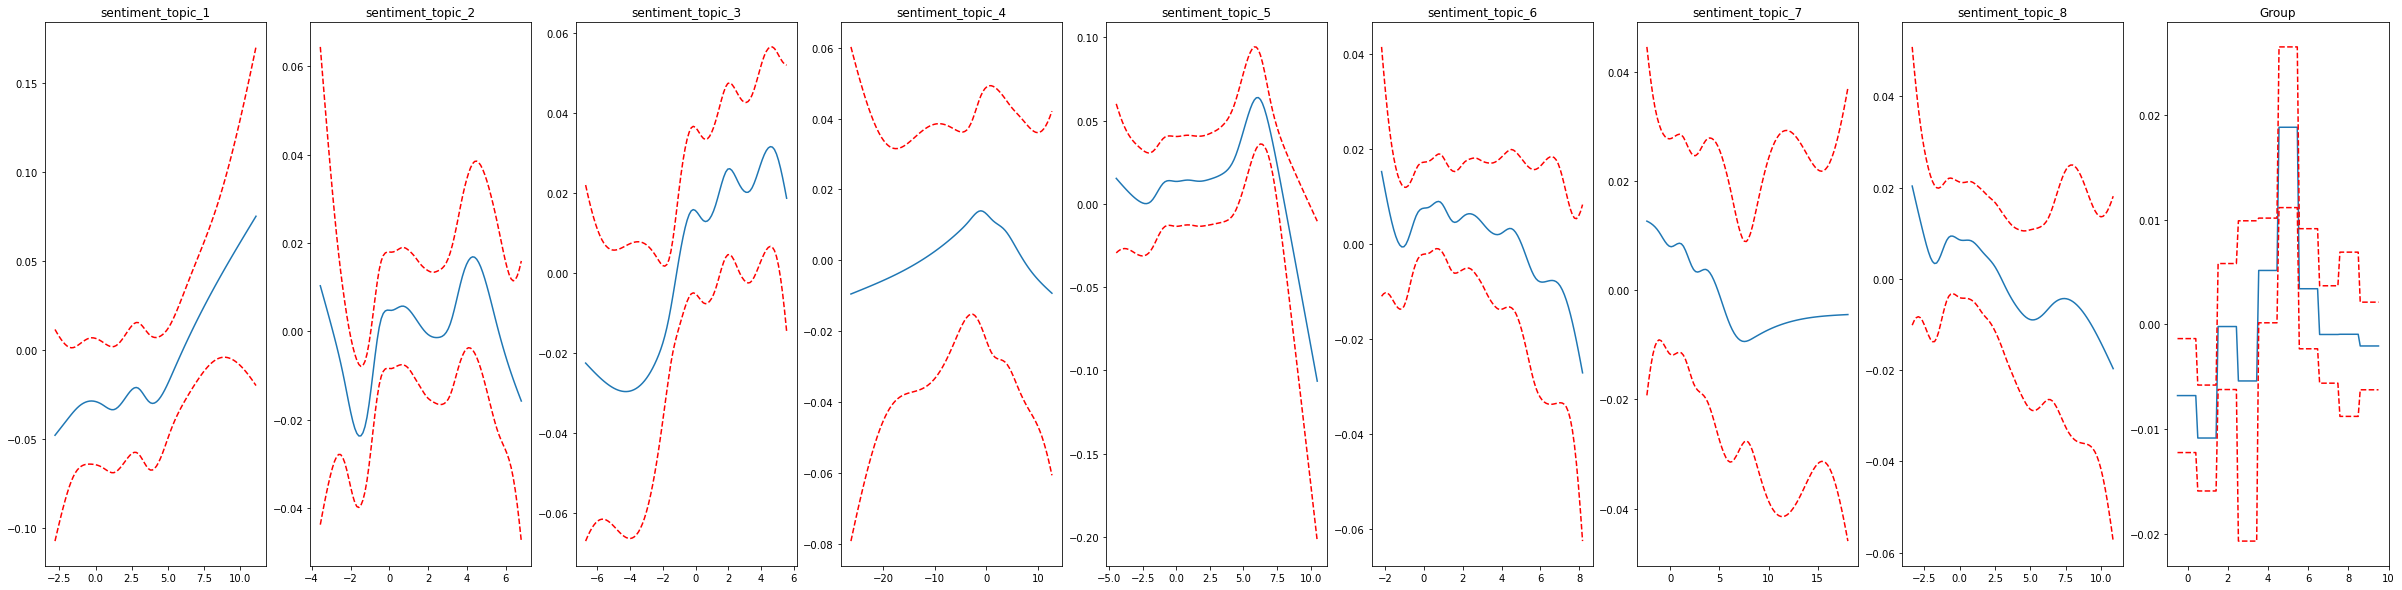

In [108]:
## plotting
plt.figure()
fig, axs = plt.subplots(1,9, figsize=(42,10))

titles = df_QA_same.iloc[:,0:9].columns.to_list()

for i, ax in enumerate(axs):
    XX = gam.generate_X_grid(term=i)
    ax.plot(XX[:, i], gam.partial_dependence(term=i, X=XX))
    ax.plot(XX[:, i], gam.partial_dependence(term=i, X=XX, width=.95)[1], c='r', ls='--')
    ax.set_title(titles[i])

In [110]:
# df_QA_interp = pd.read_csv('./regression_df_input/QA_model_df.csv')
# apply the same_direction function to the dataframe
df_QA_interp_same = same_direction(df_QA, 'D-1')
# sort the value 
df_MD_interp_same_tp5 = df_QA_interp_same.sort_values(by=['sentiment_topic_5'], ascending=False)
df_MD_interp_same_tp5.head(10)

,sentiment_topic_1,sentiment_topic_2,sentiment_topic_3,sentiment_topic_4,sentiment_topic_5,sentiment_topic_6,sentiment_topic_7,sentiment_topic_8,company_name,Group,ticker,file_name,date,WA_sentiment,D-1
1185,11.084615,0.213734,-0.227369,-0.153464,10.490207,-0.164468,0.524643,1.244725,Prudential PLC-,Life Groups & Retail Life,PRU.L,20190905_Prudential_PLC-_M-A_Call_2019-9-5_DN0...,2019-09-05,0.090872,0.018247
1143,2.632820,1.790531,1.743598,2.531570,7.050868,1.864327,7.171120,2.697815,FAIRFAX FINL,Run-off,FFH.TO,20190802_FAIRFAX_FINL_HLD-_Earnings_Call_2019-...,2019-08-02,0.103489,0.007892
74,0.134686,-0.583277,-0.407000,1.168982,6.702344,0.147620,0.163045,0.601038,Saga PLC-,Motor/Personal,SAGA.L,20180412_Saga_PLC-_Earnings_Call_2018-4-12_FS0...,2018-04-12,0.036435,0.057265
78,0.013616,1.500301,-0.435085,3.195212,6.032629,-0.422349,-0.184578,-0.091688,Saga PLC-,Motor/Personal,SAGA.L,20190919_Saga_PLC-_Earnings_Call_2019-9-19_DN0...,2019-09-19,0.040050,0.162484
75,1.377822,1.257682,-0.355610,1.303784,5.517010,0.079128,0.830024,1.812989,Saga PLC-,Motor/Personal,SAGA.L,20180927_Saga_PLC-_Earnings_Call_2018-9-27_FS0...,2018-09-27,0.051042,0.046825
1701,1.990591,0.307383,1.388736,2.721273,4.842443,-0.352818,1.579383,0.965967,Tryg A-S-,Other insurers,TRYG.CO,20171204_Tryg_A-S-_M-A_Call_2017-12-4_FS000000...,2017-12-04,0.056271,0.034323
1709,-0.502394,1.348168,-0.603416,1.412176,4.582332,0.198869,-0.345499,-0.109150,Tryg A-S-,Other insurers,TRYG.CO,20190410_Tryg_A-S-_Earnings_Call_2019-4-10_RT0...,2019-04-10,0.031839,0.037413
1706,0.041534,3.589493,-0.327433,1.470418,4.311401,-0.140399,0.559947,0.182528,Tryg A-S-,Other insurers,TRYG.CO,20181011_Tryg_A-S-_Earnings_Call_2018-10-11_FS...,2018-10-11,0.044914,0.026543
787,0.604308,3.829433,-0.284099,-0.211318,4.244702,1.392345,-0.393109,0.581011,ARGO GROUP,US - Specialty/P&C/Reinsurance,ARGO,20160503_ARGO_GROUP_INTER-_Earnings_Call_2016-...,2016-05-03,0.049287,0.055834
824,0.259760,-0.404282,-0.544702,-0.260575,4.050873,-0.260561,-0.185265,-0.415626,Chubb Corp-The-,US - Specialty/P&C/Reinsurance,CB,20150701_Chubb_Corp-The-_M-A_Call_2015-7-1_FS0...,2015-07-01,0.021757,0.007966


In [111]:
# df_QA_interp = pd.read_csv('./regression_df_input/QA_model_df.csv')
# apply the same_direction function to the dataframe
df_QA_interp_same = same_direction(df_QA, 'D-1')
# sort the value 
df_MD_interp_same_tp5 = df_QA_interp_same.sort_values(by=['sentiment_topic_5'], ascending=False)
df_MD_interp_same_tp5.tail(10)

,sentiment_topic_1,sentiment_topic_2,sentiment_topic_3,sentiment_topic_4,sentiment_topic_5,sentiment_topic_6,sentiment_topic_7,sentiment_topic_8,company_name,Group,ticker,file_name,date,WA_sentiment,D-1
555,-1.071264,-1.668920,-1.815175,-0.536161,-1.555910,-1.940815,-1.321996,-1.007757,ARCH CAPITAL,US - Specialty/P&C/Reinsurance,ACGL,20130212_ARCH_CAPITAL_GRP-_Earnings_Call_2013-...,2013-02-12,-0.019834,-0.022515
784,-0.866560,-1.596753,-0.916168,-0.399256,-1.561351,-0.731408,-0.861044,-1.112531,ARGO GROUP,US - Specialty/P&C/Reinsurance,ARGO,20151027_ARGO_GROUP_INTER-_Earnings_Call_2015-...,2015-10-27,-0.008523,-0.012409
540,-0.935497,-1.384326,-0.926174,-0.445404,-1.857574,-1.605908,-1.488320,-1.066943,TRAVELERS COS,US - Specialty/P&C/Reinsurance,TRV,20190122_TRAVELERS_COS_IN-_Earnings_Call_2019-...,2019-01-22,-0.014547,-0.013305
548,-0.904093,-1.531319,-0.963271,-0.428145,-1.984859,-1.731615,-1.039532,-1.100109,TRAVELERS COS,US - Specialty/P&C/Reinsurance,TRV,20200915_TRAVELERS_COS_IN-_Conf-Presentation_C...,2020-09-15,-0.014547,-0.020182
58,-0.785417,-1.160196,-0.860824,-0.738169,-2.056136,-0.603488,-0.626860,-0.766283,SABRE INSUR-,Motor/Personal,SBRE.L,20190328_SABRE_INSUR-_Earnings_Call_2019-3-28_...,2019-03-28,-0.005930,-0.027211
403,-0.791165,-0.887889,-0.803777,-0.612094,-2.180211,-0.698384,-0.786710,-0.767300,AMERICAN INTERNA-,US - Specialty/P&C/Reinsurance,AIG,20180108_AMERICAN_INTERNA-_Conf-Presentation_C...,2018-01-08,-0.005729,-0.006595
1607,-1.454355,-2.259176,-1.734655,-2.786041,-2.583563,-0.867091,-1.288717,-2.427644,Topdanmark AS-,Other insurers,TOP.CO,20200123_Topdanmark_AS-_Earnings_Call_2020-1-2...,2020-01-23,-0.029709,-0.030946
1384,-1.129876,-2.505639,-6.725032,-2.759553,-2.748947,-0.870699,-1.925465,-2.722088,Discovery Ltd-,Life Groups & Retail Life,DSY.JO,20120905_Discovery_Ltd-_Earnings_Call_2012-9-5...,2012-09-05,-0.052704,-0.029864
344,-2.798672,-3.555624,-3.101860,-26.216685,-3.046757,-2.181915,-2.372227,-3.370212,LANCASHIRE HOLDI-,London Market,LRE.L,20110506_LANCASHIRE_HOLDI-_Earnings_Call_2011-...,2011-05-06,-0.105327,-0.015625
818,-0.990386,-1.299363,-0.984135,-0.927417,-4.458844,-0.764867,-0.871935,-0.981834,BERKSHIRE HATH-A,US - Specialty/P&C/Reinsurance,BRK-B,20160511_BERKSHIRE_HATH-A_Conf-Presentation_Ca...,2016-05-11,-0.016037,-0.013192
